In [5]:
import numpy as np

Section A

1.

In [14]:
def correlate(f, w):
    f_h, f_w = f.shape
    w_h, w_w = w.shape
    output = np.zeros((f_h - w_h + 1, f_w - w_w + 1))
    
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i, j] = np.sum(f[i:i + w_h, j:j + w_w] * w)
    
    return output

def convolve(f, w):
    w_flipped = np.flip(w)
    return correlate(f, w_flipped)

2.

In [15]:
f = np.array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
              [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

w1 = np.array([[3, 5, 4, 7, 8]])
w2 = np.array([[1, 3], [2, 4]])

# Performing correlation and convolution
correlation_w1 = correlate(f, w1)
convolution_w1 = convolve(f, w1)

correlation_w2 = correlate(f, w2)
convolution_w2 = convolve(f, w2)

print("Correlation with w1:\n", correlation_w1)
print("Convolution with w1:\n", convolution_w1)
print("Correlation with w2:\n", correlation_w2)
print("Convolution with w2:\n", convolution_w2)

Correlation with w1:
 [[11.  9.  8.  3.  0.  8.  7.  4.  5. 11. 15.]
 [15.  7. 13. 10.  4.  5. 11.  7.  4.  5.  3.]]
Convolution with w1:
 [[ 9. 11. 15.  8.  0.  3.  5.  4.  7. 11.  8.]
 [20. 12. 10. 13.  4.  7. 11.  5.  4.  7.  8.]]
Correlation with w2:
 [[6. 5. 8. 3. 0. 4. 2. 0. 3. 5. 2. 0. 3. 4.]]
Convolution with w2:
 [[4. 5. 7. 7. 0. 1. 3. 0. 2. 5. 3. 0. 2. 6.]]


3.

In [16]:
def pad_matrix(f, pad_size):
    return np.pad(f, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')

# Padding the matrix f
padded_f = pad_matrix(f, 3)

# Performing correlation and convolution with stride 2
def stride_operation(f, w, stride=2, operation='correlate'):
    f_h, f_w = f.shape
    w_h, w_w = w.shape
    output = []
    
    for i in range(0, f_h - w_h + 1, stride):
        row = []
        for j in range(0, f_w - w_w + 1, stride):
            if operation == 'correlate':
                row.append(np.sum(f[i:i + w_h, j:j + w_w] * w))
            elif operation == 'convolve':
                row.append(np.sum(f[i:i + w_h, j:j + w_w] * np.flip(w)))
        output.append(row)
    
    return np.array(output)
print(padded_f)
# Performing correlation and convolution on padded matrix
stride_correlation_w1 = stride_operation(padded_f, w1, stride=2, operation='correlate')
stride_convolution_w1 = stride_operation(padded_f, w1, stride=2, operation='convolve')

print("Stride Correlation with padding (w1):\n", stride_correlation_w1)
print("Stride Convolution with padding (w1):\n", stride_convolution_w1)

# Padding Effect: Adding a padding of size 3 expands the image boundary, allowing more operations to be performed, especially on the edges.
# The output now includes values from areas near the edges of the image that were initially ignored. This means the filtered result captures more of the boundary features.

# Stride: With a stride of 2, the filter moves two steps at a time, so fewer computations are done compared to a stride of 1. This results in a smaller output matrix.
# The result is downsampled due to the larger strides, which reduces the resolution of the output compared to the stride of 1.

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Stride Correlation with padding (w1):
 [[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [15 17  7 10  5  7  5  0  0]
 [ 0  0  0  0  0  0  0  0  0]]
Stride Convolution with padding (w1):
 [[ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 8 14 12 13  7  5  7  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


Section B

1.

In [2]:
import scipy.io
import os
import tarfile
from PIL import Image
import matplotlib.pyplot as plt

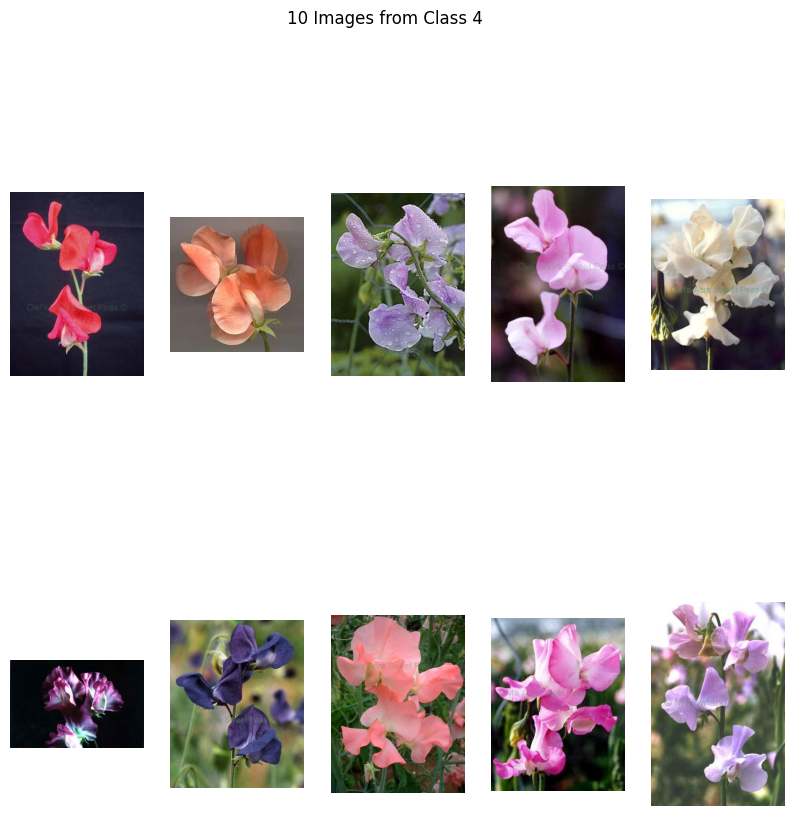

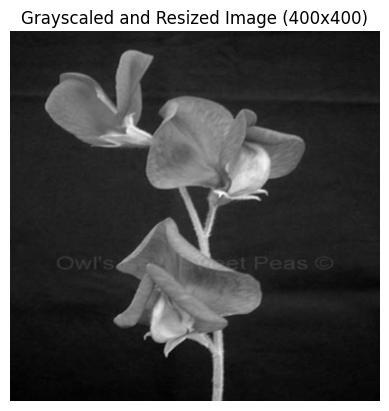

In [8]:
def extract_dataset():
    with tarfile.open('102flowers.tgz', 'r:gz') as tar:
        tar.extractall(path=extract_dir)

def load_labels():
    data = scipy.io.loadmat('imagelabels.mat')
    return data['labels'][0]

extract_dir = '102flowers'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
    extract_dataset()
labels = load_labels()

class_4_indices = np.where(labels == 4)[0]

# Load 10 images from class 4
image_paths = [f'102flowers/jpg/image_{idx+1:05d}.jpg' for idx in class_4_indices[:10]]
images = [Image.open(path) for path in image_paths]

# Display 10 images
plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('10 Images from Class 4')
plt.show()

# Grayscale and resize one random image to 400x400
f_xy = images[0].convert('L').resize((400, 400))
plt.imshow(f_xy, cmap='gray')
plt.title('Grayscaled and Resized Image (400x400)')
plt.axis('off')
plt.show()

2.

In [6]:
import cv2
from scipy.ndimage import gaussian_filter

In [9]:
f_xy_array = np.array(f_xy)

(a)

In [10]:
box_kernel_6x6 = np.ones((6, 6), dtype=float) / 36
box_kernel_10x10 = np.ones((10, 10), dtype=float) / 100

box_filtered_6x6 = cv2.filter2D(f_xy_array, -1, box_kernel_6x6)
box_filtered_10x10 = cv2.filter2D(f_xy_array, -1, box_kernel_10x10)

(b)

In [11]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gaussian_kernel_1 = gaussian_kernel(13, 1)
gaussian_kernel_3 = gaussian_kernel(25, 3)
gaussian_kernel_7 = gaussian_kernel(49, 7)

# Apply Gaussian filters with sigma = 1, 3, 7
gaussian_filtered_1 = gaussian_filter(f_xy_array, sigma=1)
gaussian_filtered_3 = gaussian_filter(f_xy_array, sigma=3)
gaussian_filtered_7 = gaussian_filter(f_xy_array, sigma=7)

(c)

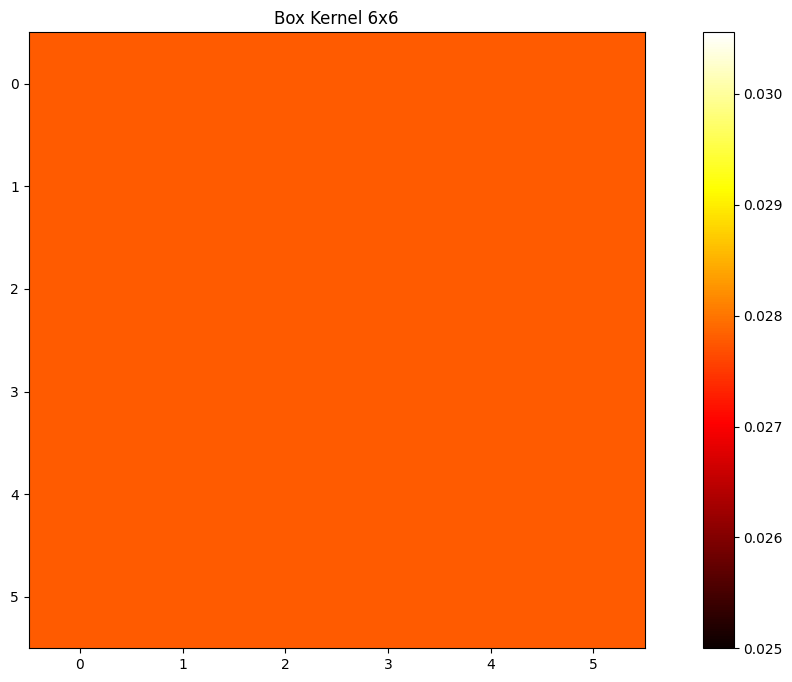

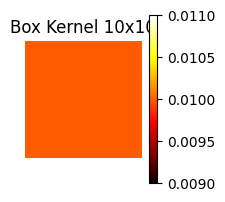

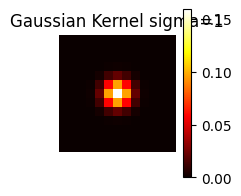

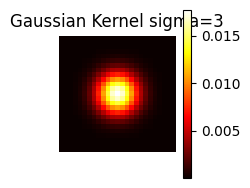

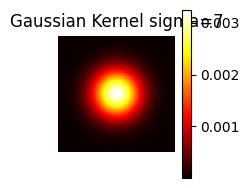

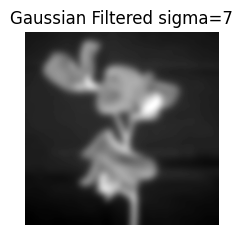

In [12]:
# Function to display kernel as heat map
def display_kernel(kernel, title):
    plt.imshow(kernel, cmap='hot')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Display kernels and filtered images
plt.figure(figsize=(15, 8))

display_kernel(box_kernel_6x6, 'Box Kernel 6x6')

plt.subplot(2, 3, 1)
plt.imshow(box_filtered_6x6, cmap='gray')
plt.title('Box Filtered Image 6x6')
plt.axis('off')

display_kernel(box_kernel_10x10, 'Box Kernel 10x10')

plt.subplot(2, 3, 2)
plt.imshow(box_filtered_10x10, cmap='gray')
plt.title('Box Filtered Image 10x10')
plt.axis('off')

display_kernel(gaussian_kernel_1, 'Gaussian Kernel sigma=1')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_filtered_1, cmap='gray')
plt.title('Gaussian Filtered sigma=1')
plt.axis('off')

display_kernel(gaussian_kernel_3, 'Gaussian Kernel sigma=3')

plt.subplot(2, 3, 4)
plt.imshow(gaussian_filtered_3, cmap='gray')
plt.title('Gaussian Filtered sigma=3')
plt.axis('off')

display_kernel(gaussian_kernel_7, 'Gaussian Kernel sigma=7')

plt.subplot(2, 3, 5)
plt.imshow(gaussian_filtered_7, cmap='gray')
plt.title('Gaussian Filtered sigma=7')
plt.axis('off')

plt.tight_layout()
plt.show()


3.

In [22]:
k_values = [0.5, 1, 1.5]

In [ ]:
f_output = [box_filtered_6x6, box_filtered_10x10, gaussian_filtered_1, gaussian_filtered_3, gaussian_filtered_7]

# Perform unsharp masking
for f_hat in f_output:
    for k in k_values:
        f_sharp = f_xy_array + k * (f_xy_array - f_hat)
        f_sharp = np.clip(f_sharp, 0, 255)
        
        # Display the sharpened image
        plt.imshow(f_sharp.astype(np.uint8), cmap='gray')
        plt.title(f'Unsharp Masking with k={k}')
        plt.axis('off')
        plt.show()

4.

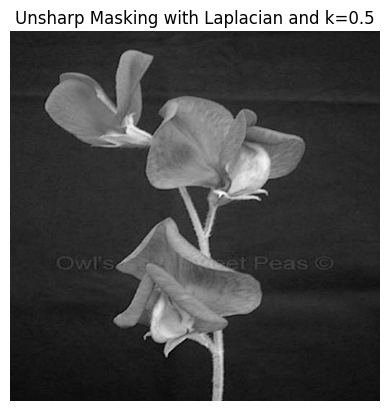

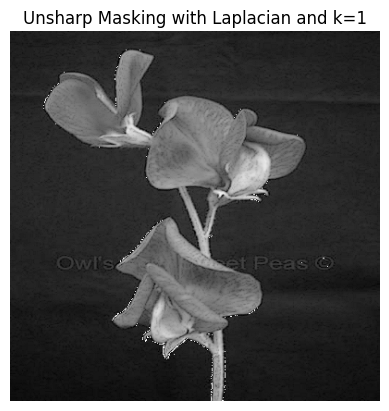

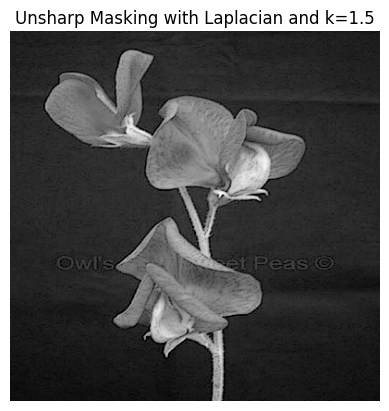

In [23]:
# Laplacian filter without diagonals
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Apply Laplacian filter
f_hat_laplacian = cv2.filter2D(f_xy_array, -1, laplacian_kernel)

# Unsharp masking with f̂(x, y) = ∇²f
for k in k_values:
    f_sharp_lap = f_xy_array - k * f_hat_laplacian
    f_sharp_lap = np.clip(f_sharp_lap, 0, 255)
    plt.imshow(f_sharp_lap.astype(np.uint8), cmap='gray')
    plt.title(f'Unsharp Masking with Laplacian and k={k}')
    plt.axis('off')
    plt.show()

# Unsharp Masking enhances the edges by adding a weighted difference between the original and blurred image.
# When k < 1, the sharpening is subtle; when k = 1, there is noticeable sharpening; and when k > 1, the edges become even more pronounced.

# Box Filter:
# Unsharp masking applied to the box-filtered image tends to sharpen large, uniform areas more evenly, but can result in blocky artifacts since the box filter performs a simple averaging over large regions.

# Gaussian Filter:

# Unsharp masking on the Gaussian-filtered image is smoother.
# The Gaussian filter preserves more natural edges due to its bell-shaped kernel, so the resulting sharpened image looks less harsh and more refined than the box-filtered version.

# k < 1: Slight sharpening, edges are enhanced subtly.
# k = 1: Standard sharpening, edges are noticeably enhanced.
# k > 1: Over-sharpening can lead to unnatural appearance and noise amplification.

# With Laplacian Filter:

# The Laplacian operator highlights areas of rapid intensity change, such as edges, more aggressively compared to simple unsharp masking.
# This operator emphasizes the high-frequency components (edges and noise) more than the previous methods.

# The image may appear overly enhanced or noisy if not controlled with the appropriate value of k.
# k < 1: Subtle sharpening, preserves smoothness.
# k = 1: Standard sharpening, noticeable enhancement.
# k > 1: Over-sharpening, high risk of noise amplification.

5.

In [24]:
from scipy import fftpack

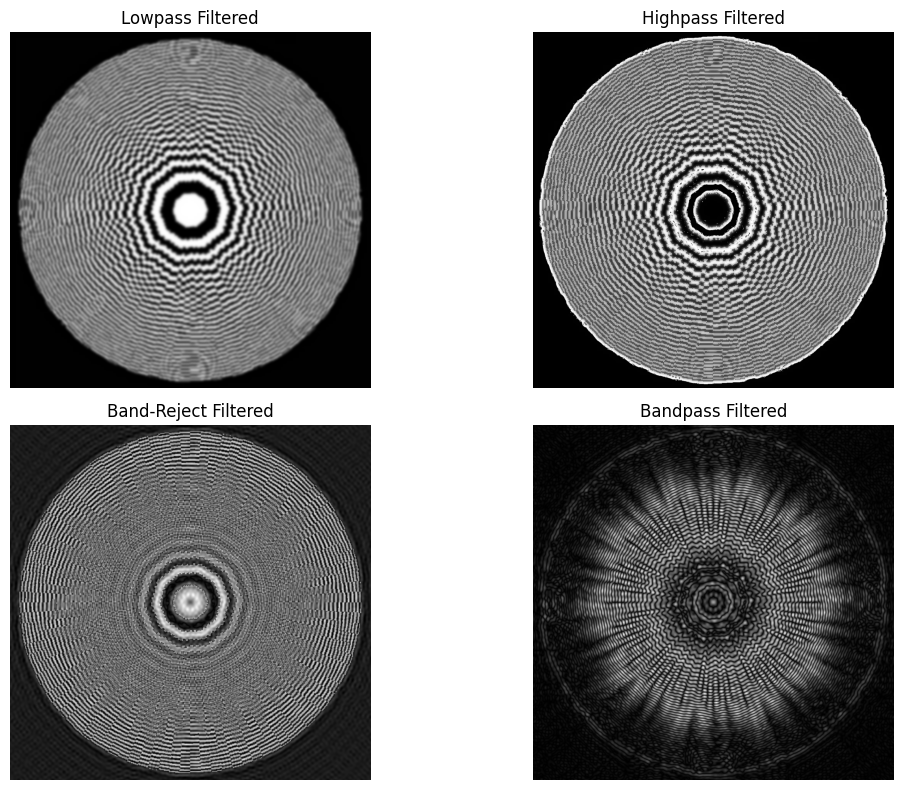

In [25]:
img_filter = Image.open('img_filter.png').convert('L')
img_filter_array = np.array(img_filter)

# Lowpass Filter (Gaussian Filter)
lowpass_filtered = gaussian_filter(img_filter_array, sigma=5)

# Highpass Filter (Original - Lowpass)
highpass_filtered = img_filter_array - lowpass_filtered


# Perform FFT
f_fft = fftpack.fftshift(fftpack.fft2(img_filter_array))

# Create Band-Reject Filter Mask
rows, cols = img_filter_array.shape
crow, ccol = rows // 2 , cols // 2
band_reject_mask = np.ones((rows, cols), dtype=np.uint8)
r_inner = 30
r_outer = 80

for u in range(rows):
    for v in range(cols):
        D = np.sqrt((u - crow)**2 + (v - ccol)**2)
        if r_inner <= D <= r_outer:
            band_reject_mask[u, v] = 0

# Apply Band-Reject Filter
f_fft_filtered = f_fft * band_reject_mask
band_reject_filtered = np.abs(fftpack.ifft2(fftpack.ifftshift(f_fft_filtered)))

# Bandpass Filter (Complement of Band-Reject)
bandpass_mask = 1 - band_reject_mask
f_fft_bandpass = f_fft * bandpass_mask
bandpass_filtered = np.abs(fftpack.ifft2(fftpack.ifftshift(f_fft_bandpass)))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(lowpass_filtered, cmap='gray')
plt.title('Lowpass Filtered')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(highpass_filtered, cmap='gray')
plt.title('Highpass Filtered')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(band_reject_filtered, cmap='gray')
plt.title('Band-Reject Filtered')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bandpass_filtered, cmap='gray')
plt.title('Bandpass Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()

# Lowpass Filter:

# Applied Gaussian filter with a high sigma to remove high-frequency components.
# Result: Image appears blurred; edges are less sharp.

# Highpass Filter:

# Subtracted the lowpass filtered image from the original.
# Result: Highlights edges and fine details; image may appear as edges on a dark background.

# Band-Reject Filter:

# Created a mask to block frequencies within a certain range in the frequency domain.
# Result: Removes specific frequency bands; can reduce certain patterns or noises.

# Bandpass Filter:

# Complement of band-reject; passes frequencies within a certain range.
# Result: Emphasizes specific patterns or textures associated with those frequencies.

Section C

1.

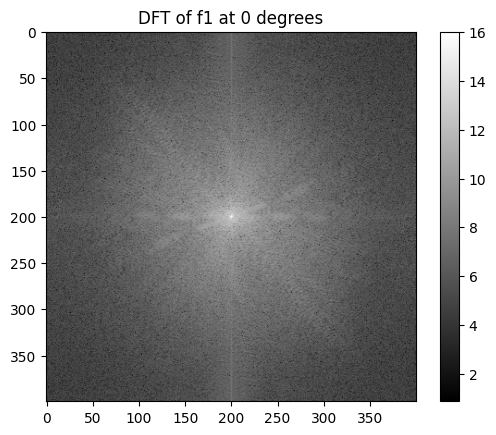

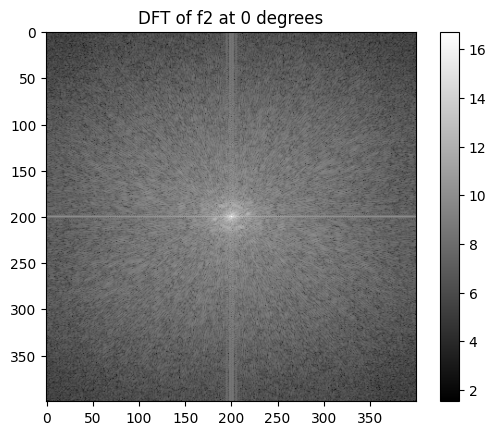

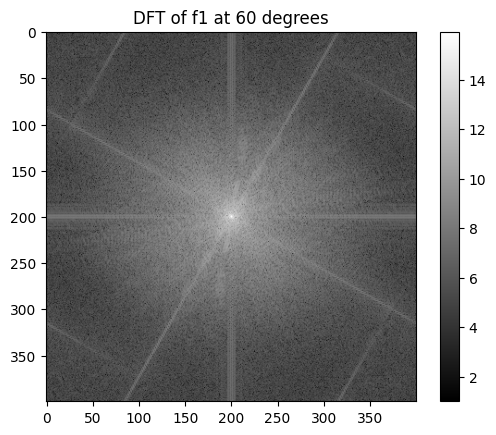

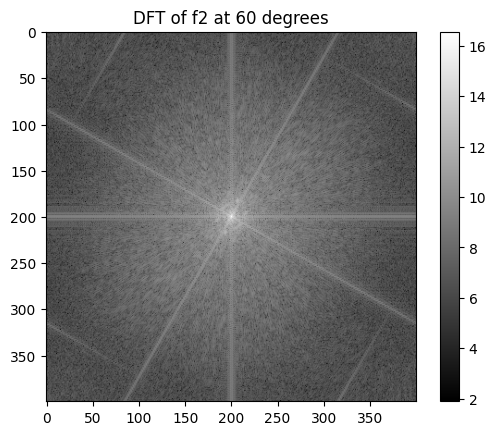

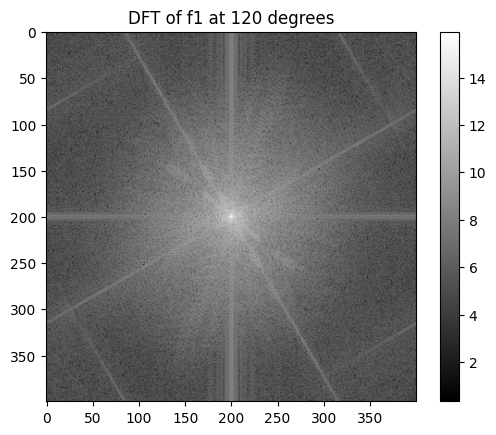

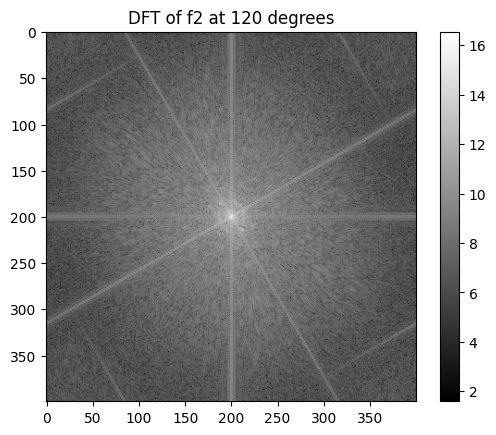

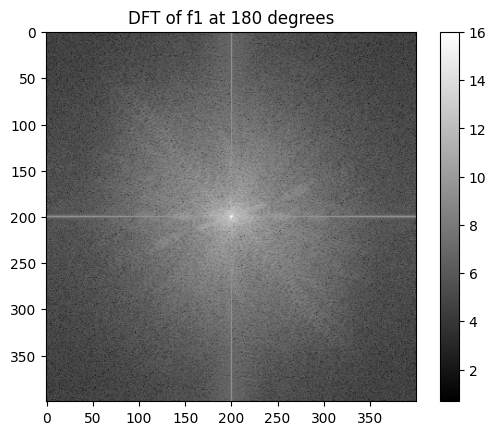

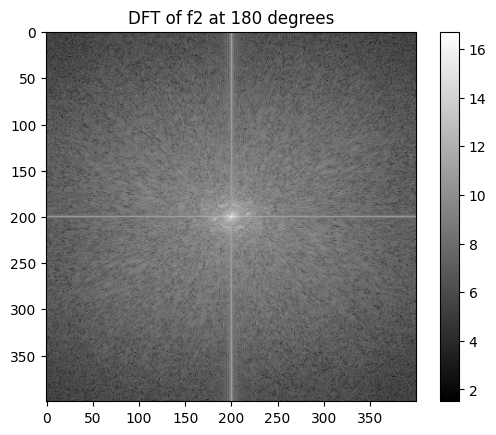

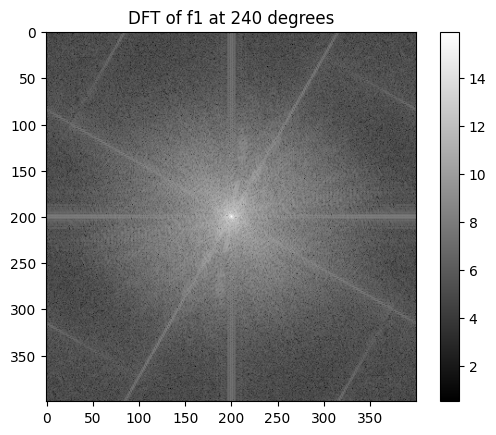

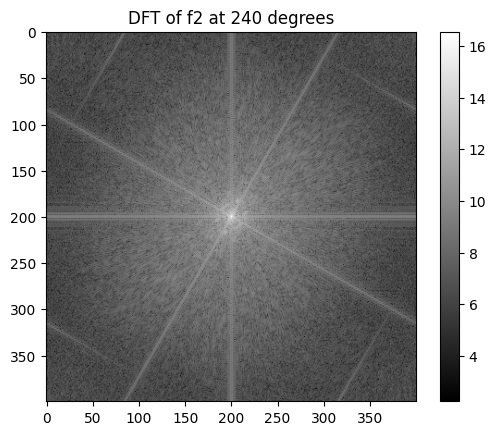

In [29]:
def plot_dft(image, title):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = np.log(np.abs(dft_shift) + 1)
    
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

f1_resized = f_xy_array

labels = scipy.io.loadmat('imagelabels.mat')['labels'][0]

another_class_label = 10
class_10_indices = np.where(labels == another_class_label)[0]

image_dir = '102flowers/jpg/'
image_paths_class_10 = [os.path.join(image_dir, f'image_{idx+1:05d}.jpg') for idx in class_10_indices]

# Load the first image from class 10
f2_image = Image.open(image_paths_class_10[0])

f2_grayscale = f2_image.convert('L')

f2_resized = np.array(f2_grayscale.resize((400, 400)))

# Apply rotations to the images
angles = [0, 60, 120, 180, 240]
for angle in angles:
    f1_rotated = cv2.warpAffine(f1_resized, cv2.getRotationMatrix2D((200, 200), angle, 1), (400, 400))
    f2_rotated = cv2.warpAffine(f2_resized, cv2.getRotationMatrix2D((200, 200), angle, 1), (400, 400))
    
    # Plot DFT contour plots for f1 and f2
    plot_dft(f1_rotated, f"DFT of f1 at {angle} degrees")
    plot_dft(f2_rotated, f"DFT of f2 at {angle} degrees")

2.

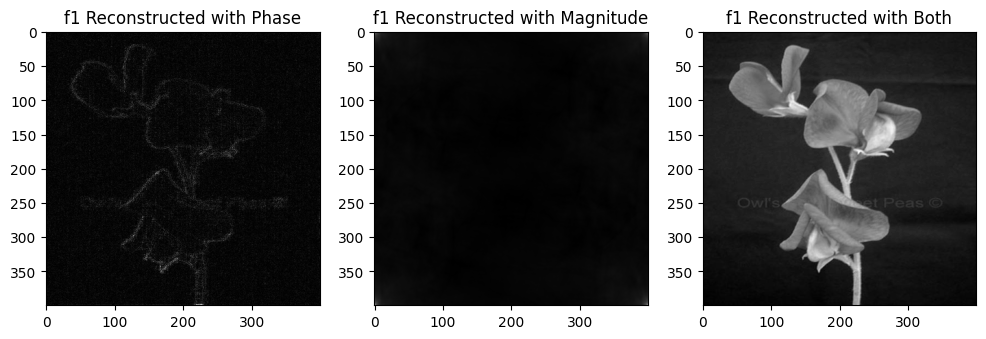

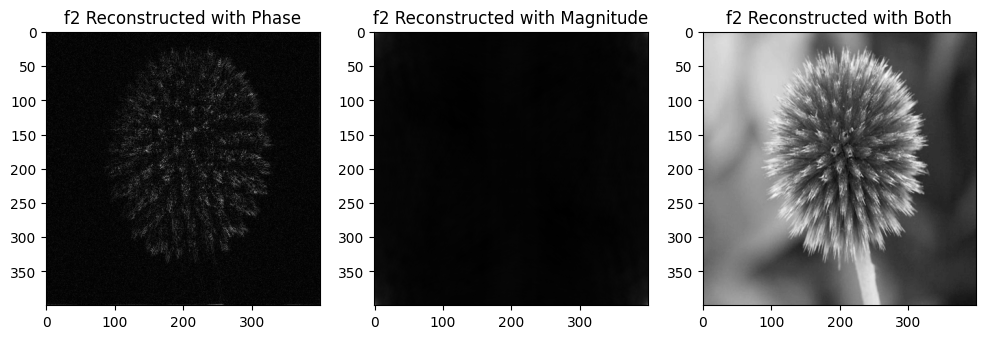

In [30]:
def reconstruct_image(dft_shift, use_phase=True, use_magnitude=True):
    magnitude = np.abs(dft_shift)
    phase = np.angle(dft_shift)
    
    if use_phase and use_magnitude:
        dft_combined = magnitude * np.exp(1j * phase)
    elif use_magnitude:
        dft_combined = magnitude
    elif use_phase:
        dft_combined = np.exp(1j * phase)
    
    img_back = np.fft.ifft2(np.fft.ifftshift(dft_combined))
    img_back = np.abs(img_back)
    
    return img_back

dft_f1 = np.fft.fftshift(np.fft.fft2(f1_resized))
dft_f2 = np.fft.fftshift(np.fft.fft2(f2_resized))

# Reconstruct using only magnitude, only phase, and both
img_f1_phase = reconstruct_image(dft_f1, use_phase=True, use_magnitude=False)
img_f1_magnitude = reconstruct_image(dft_f1, use_phase=False, use_magnitude=True)
img_f1_combined = reconstruct_image(dft_f1, use_phase=True, use_magnitude=True)

img_f2_phase = reconstruct_image(dft_f2, use_phase=True, use_magnitude=False)
img_f2_magnitude = reconstruct_image(dft_f2, use_phase=False, use_magnitude=True)
img_f2_combined = reconstruct_image(dft_f2, use_phase=True, use_magnitude=True)

# Plot the reconstructions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img_f1_phase, cmap='gray'), plt.title('f1 Reconstructed with Phase')
plt.subplot(1, 3, 2), plt.imshow(img_f1_magnitude, cmap='gray'), plt.title('f1 Reconstructed with Magnitude')
plt.subplot(1, 3, 3), plt.imshow(img_f1_combined, cmap='gray'), plt.title('f1 Reconstructed with Both')

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img_f2_phase, cmap='gray'), plt.title('f2 Reconstructed with Phase')
plt.subplot(1, 3, 2), plt.imshow(img_f2_magnitude, cmap='gray'), plt.title('f2 Reconstructed with Magnitude')
plt.subplot(1, 3, 3), plt.imshow(img_f2_combined, cmap='gray'), plt.title('f2 Reconstructed with Both')
plt.show()

In [31]:
from numpy.fft import fft2, fftshift

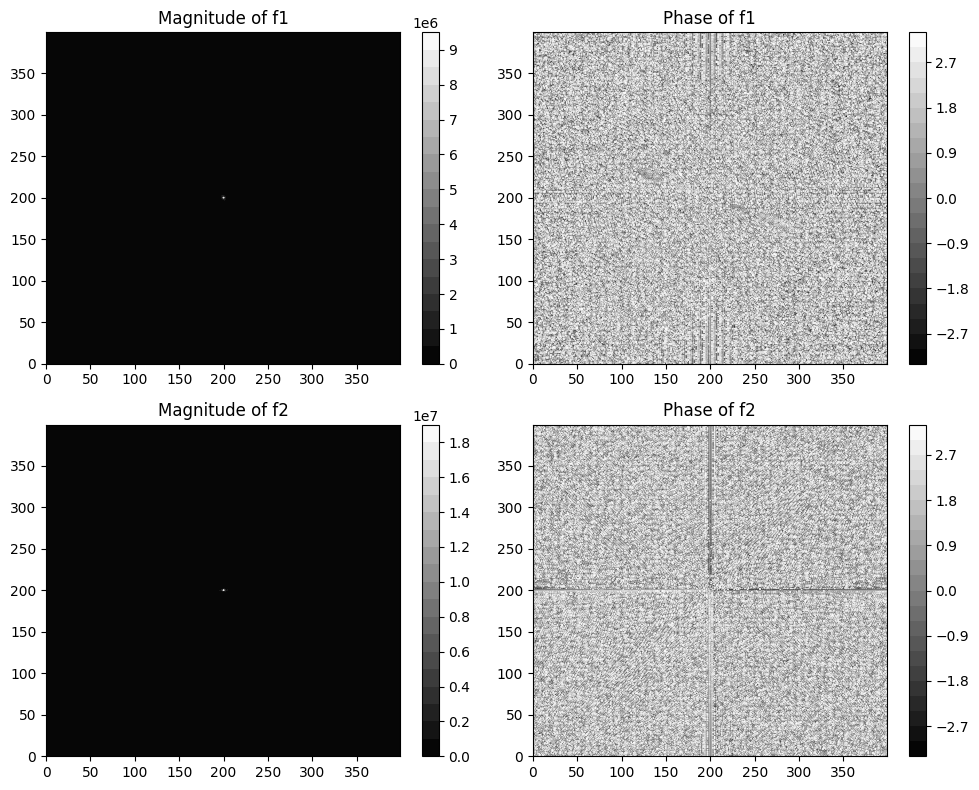

In [32]:
magnitude_f1 = np.abs(dft_f1)
magnitude_f2 = np.abs(dft_f2)
phase_f1 = np.angle(dft_f1)
phase_f2 = np.angle(dft_f2)

# Plot contour plots
plt.figure(figsize=(10, 8))

# Magnitude and phase for image f1
plt.subplot(2, 2, 1)
plt.contourf(magnitude_f1, 20, cmap='gray')
plt.title('Magnitude of f1')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(phase_f1, 20, cmap='gray')
plt.title('Phase of f1')
plt.colorbar()

# Magnitude and phase for image f2
plt.subplot(2, 2, 3)
plt.contourf(magnitude_f2, 20, cmap='gray')
plt.title('Magnitude of f2')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(phase_f2, 20, cmap='gray')
plt.title('Phase of f2')
plt.colorbar()

plt.tight_layout()
plt.show()

3.

In [33]:
from scipy.fft import fft2, fftshift

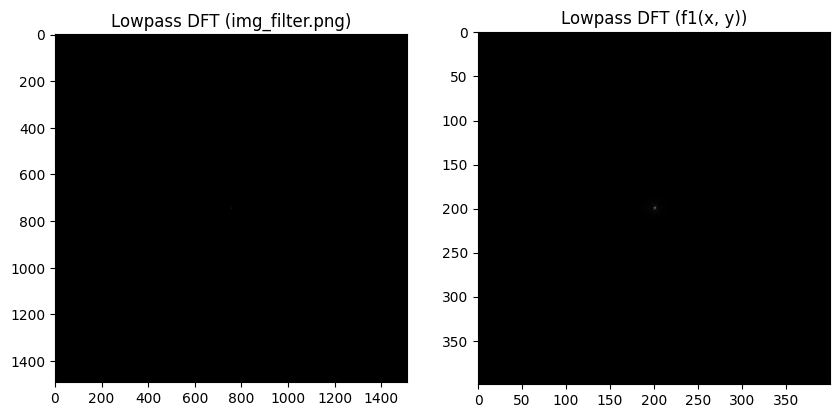

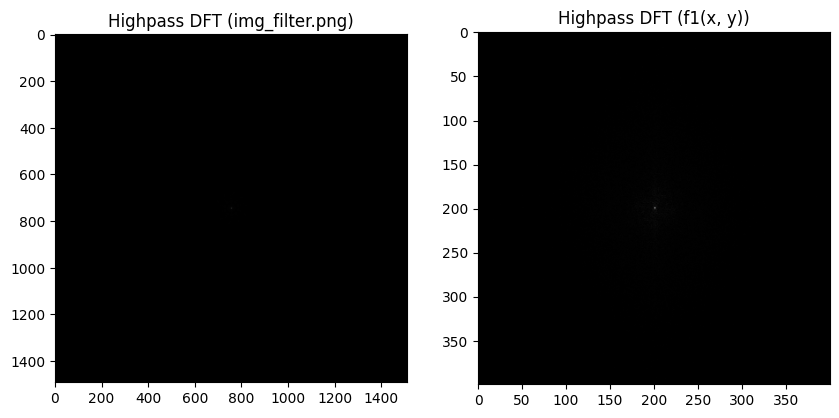

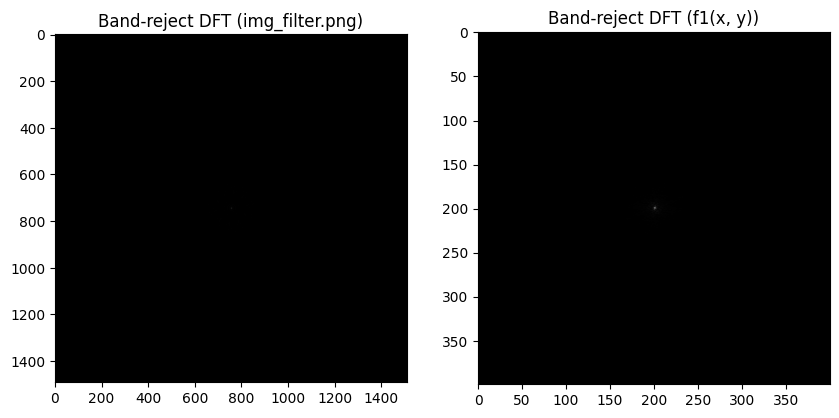

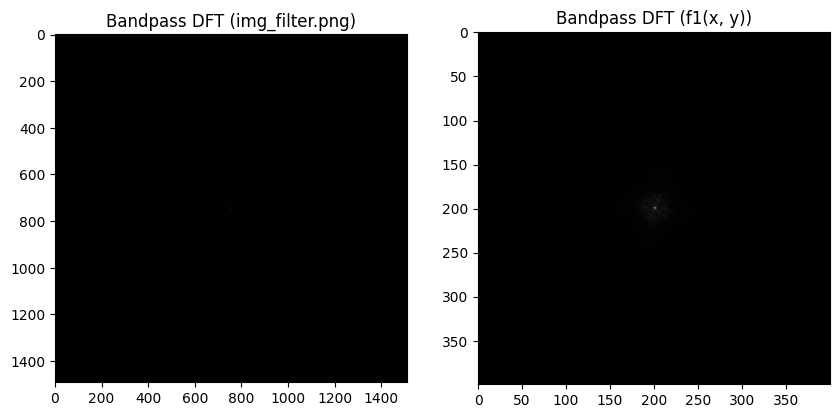

In [34]:
img_filter = Image.open('img_filter.png').convert('L')
f1 = f_xy

def apply_filter_and_dft(image, filter_func):
    filtered_image = filter_func(image)
    dft_filtered = fftshift(fft2(filtered_image))
    return np.abs(dft_filtered)

def lowpass_filter(image):
    return gaussian_filter(image, sigma=5)

def highpass_filter(image):
    return image - lowpass_filter(image)

def bandpass_filter(image):
    return highpass_filter(lowpass_filter(image))

def band_reject_filter(image):
    return image - bandpass_filter(image)

# Apply filters and find DFTs
for filter_name, filter_func in zip(['Lowpass', 'Highpass', 'Band-reject', 'Bandpass'],
                                    [lowpass_filter, highpass_filter, band_reject_filter, bandpass_filter]):
    dft_img_filter = apply_filter_and_dft(np.array(img_filter), filter_func)
    dft_f1 = apply_filter_and_dft(np.array(f1), filter_func)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(dft_img_filter, cmap='gray')
    plt.title(f'{filter_name} DFT (img_filter.png)')
    
    plt.subplot(1, 2, 2)
    plt.imshow(dft_f1, cmap='gray')
    plt.title(f'{filter_name} DFT (f1(x, y))')
    plt.show()


# Lowpass Filter: The DFT of the lowpass-filtered image shows that most of the high-frequency components (which correspond to fine details and noise) are removed. The resulting image becomes blurred, and the DFT primarily contains low-frequency components around the center.

# Highpass Filter: The DFT of the highpass-filtered image contains more high-frequency components, representing edges and fine details. The low-frequency components (smooth areas) are suppressed, resulting in a sharper image.

# Band-reject Filter: This filter removes a specific range of frequencies from the image. In the DFT, the middle-frequency components are suppressed, leaving both high and low frequencies intact. The image appears to lose specific patterns or textures.

# Bandpass Filter: The bandpass filter retains only a specific range of frequencies, and the DFT shows the removal of both high and low frequencies. This highlights specific structures or textures in the image that correspond to the selected frequency band.


4.

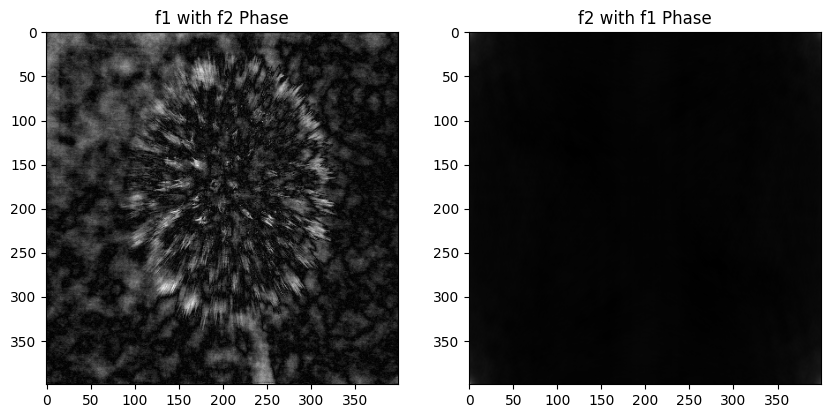

In [35]:
def interchange_phase(dft_f1, dft_f2):
    magnitude_f1 = np.abs(dft_f1)
    phase_f1 = np.angle(dft_f1)
    
    magnitude_f2 = np.abs(dft_f2)
    phase_f2 = np.angle(dft_f2)
    
    # Interchanging phases
    dft_f1_new = magnitude_f1 * np.exp(1j * phase_f2)
    dft_f2_new = magnitude_f2 * np.exp(1j * phase_f1)
    
    # Inverse DFT to get back to image space
    img_f1_new = np.fft.ifft2(np.fft.ifftshift(dft_f1_new))
    img_f1_new = np.abs(img_f1_new)
    
    img_f2_new = np.fft.ifft2(np.fft.ifftshift(dft_f2_new))
    img_f2_new = np.abs(img_f2_new)
    
    return img_f1_new, img_f2_new

# Interchange phases between f1 and f2
img_f1_new, img_f2_new = interchange_phase(dft_f1, dft_f2)

# Plot the images after phase interchange
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img_f1_new, cmap='gray'), plt.title('f1 with f2 Phase')
plt.subplot(1, 2, 2), plt.imshow(img_f2_new, cmap='gray'), plt.title('f2 with f1 Phase')
plt.show()

5.

In [36]:
from scipy.fft import ifft2

(a)

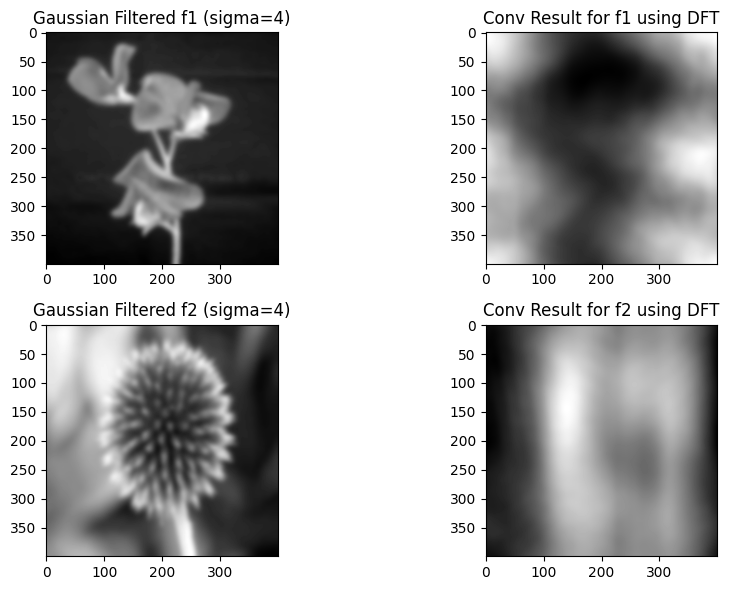

In [39]:
f1 = f1_resized
f2 = f2_resized

def apply_convolution_theorem(f, f_filtered):
    dft_f = fftshift(fft2(f))
    dft_f_filtered = fftshift(fft2(f_filtered))
    
    # Multiply DFTs in frequency domain
    dft_product = dft_f * dft_f_filtered
    
    # Inverse DFT to get the result in spatial domain
    conv_result = ifft2(fftshift(dft_product)).real
    return conv_result

# Apply Gaussian filter (sigma = 4)
sigma = 4
f1_filtered_gaussian = gaussian_filter(f1, sigma=sigma)
f2_filtered_gaussian = gaussian_filter(f2, sigma=sigma)

# Apply convolution theorem for both images
conv_result_f1_gaussian = apply_convolution_theorem(f1, f1_filtered_gaussian)
conv_result_f2_gaussian = apply_convolution_theorem(f2, f2_filtered_gaussian)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(f1_filtered_gaussian, cmap='gray')
plt.title('Gaussian Filtered f1 (sigma=4)')

plt.subplot(2, 2, 2)
plt.imshow(conv_result_f1_gaussian, cmap='gray')
plt.title('Conv Result for f1 using DFT')

plt.subplot(2, 2, 3)
plt.imshow(f2_filtered_gaussian, cmap='gray')
plt.title('Gaussian Filtered f2 (sigma=4)')

plt.subplot(2, 2, 4)
plt.imshow(conv_result_f2_gaussian, cmap='gray')
plt.title('Conv Result for f2 using DFT')

plt.tight_layout()
plt.show()


(b)

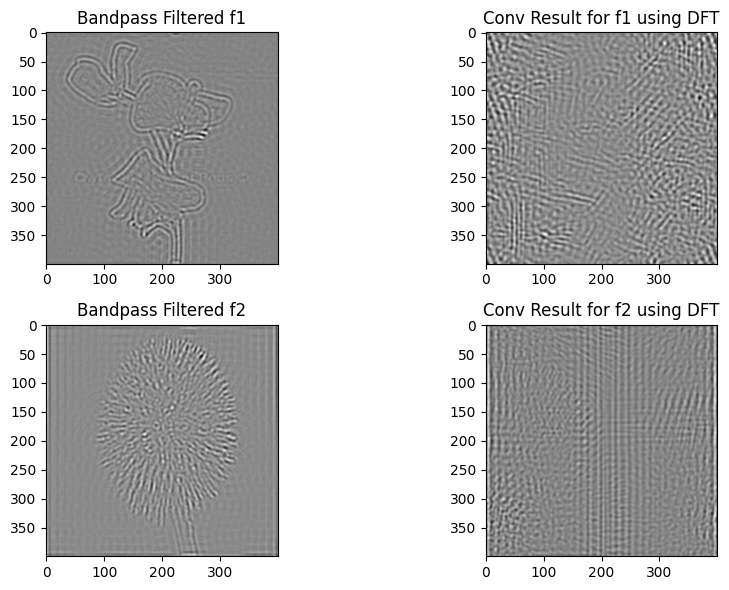

In [40]:
def bandpass_filter(image, low_freq_cutoff, high_freq_cutoff):
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    # Mask with low-frequency and high-frequency cutoffs
    mask = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u - crow)**2 + (v - ccol)**2)
            if low_freq_cutoff < D < high_freq_cutoff:
                mask[u, v] = 1
    
    dft_image = fftshift(fft2(image))
    dft_filtered = dft_image * mask
    
    filtered_image = ifft2(fftshift(dft_filtered)).real
    return filtered_image

# Apply Bandpass filter
low_freq_cutoff = 30
high_freq_cutoff = 60
f1_filtered_bandpass = bandpass_filter(f1, low_freq_cutoff, high_freq_cutoff)
f2_filtered_bandpass = bandpass_filter(f2, low_freq_cutoff, high_freq_cutoff)

# Apply convolution theorem for bandpass filter
conv_result_f1_bandpass = apply_convolution_theorem(f1, f1_filtered_bandpass)
conv_result_f2_bandpass = apply_convolution_theorem(f2, f2_filtered_bandpass)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(f1_filtered_bandpass, cmap='gray')
plt.title('Bandpass Filtered f1')

plt.subplot(2, 2, 2)
plt.imshow(conv_result_f1_bandpass, cmap='gray')
plt.title('Conv Result for f1 using DFT')

plt.subplot(2, 2, 3)
plt.imshow(f2_filtered_bandpass, cmap='gray')
plt.title('Bandpass Filtered f2')

plt.subplot(2, 2, 4)
plt.imshow(conv_result_f2_bandpass, cmap='gray')
plt.title('Conv Result for f2 using DFT')

plt.tight_layout()
plt.show()


(c)

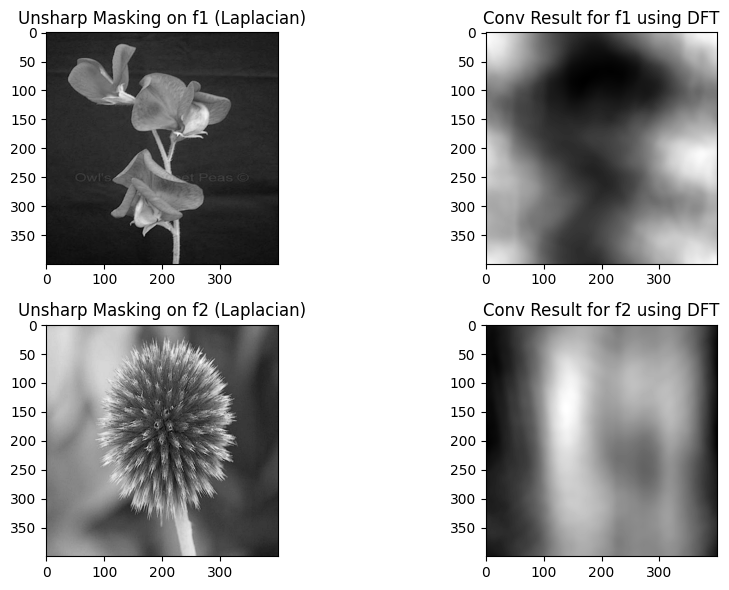

In [41]:
def laplacian_filter(image):
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    return cv2.filter2D(image, -1, laplacian_kernel)

def unsharp_masking_laplacian(image, k):
    laplacian = laplacian_filter(image)
    return np.clip(image - k * laplacian, 0, 255)

# Apply unsharp masking with Laplacian (k < 1)
k = 0.5
f1_unsharp = unsharp_masking_laplacian(f1, k)
f2_unsharp = unsharp_masking_laplacian(f2, k)

# Apply convolution theorem for unsharp masking
conv_result_f1_unsharp = apply_convolution_theorem(f1, f1_unsharp)
conv_result_f2_unsharp = apply_convolution_theorem(f2, f2_unsharp)

# Display results
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(f1_unsharp, cmap='gray')
plt.title('Unsharp Masking on f1 (Laplacian)')

plt.subplot(2, 2, 2)
plt.imshow(conv_result_f1_unsharp, cmap='gray')
plt.title('Conv Result for f1 using DFT')

plt.subplot(2, 2, 3)
plt.imshow(f2_unsharp, cmap='gray')
plt.title('Unsharp Masking on f2 (Laplacian)')

plt.subplot(2, 2, 4)
plt.imshow(conv_result_f2_unsharp, cmap='gray')
plt.title('Conv Result for f2 using DFT')

plt.tight_layout()
plt.show()

6.

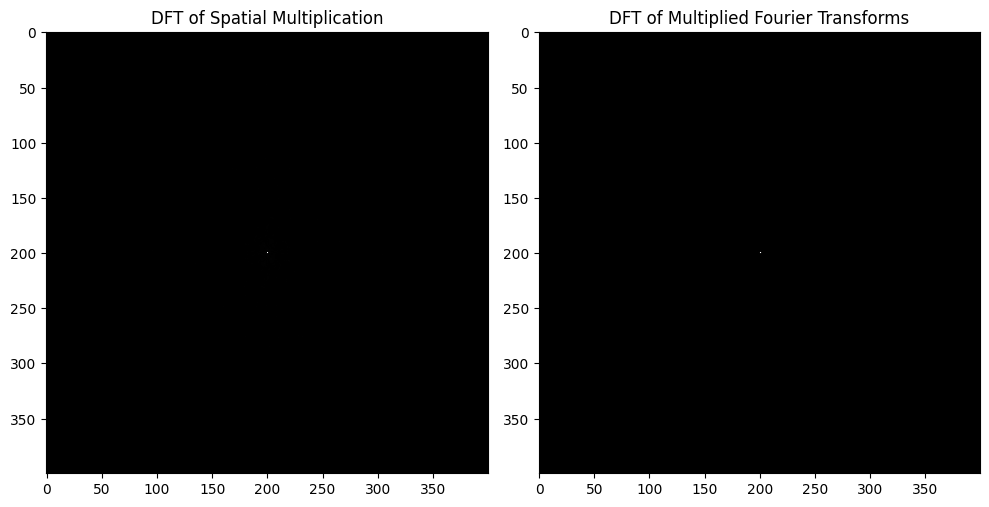

In [43]:

img_filter = Image.open('img_filter.png').convert('L').resize((400, 400))
img_filter = np.array(img_filter)
f = f1_resized

# Multiply the images in spatial domain
spatial_multiplication = img_filter * f

# Compute Fourier Transform of both images
dft_img_filter = fft2(img_filter)
dft_f = fft2(f)

# Multiply the Fourier Transforms
dft_multiplication = dft_img_filter * dft_f

# Compute Fourier Transform of the spatially multiplied image
dft_spatial_multiplication = fft2(spatial_multiplication)

# Visualize the results (comparison of magnitude)
plt.figure(figsize=(10, 8))

# Magnitude of DFT of spatially multiplied image
plt.subplot(1, 2, 1)
plt.imshow(np.abs(fftshift(dft_spatial_multiplication)), cmap='gray')
plt.title('DFT of Spatial Multiplication')

# Magnitude of DFT multiplication result
plt.subplot(1, 2, 2)
plt.imshow(np.abs(fftshift(dft_multiplication)), cmap='gray')
plt.title('DFT of Multiplied Fourier Transforms')

plt.tight_layout()
plt.show()

# Spatial Domain Multiplication: Directly multiplying two images in the spatial domain and taking the DFT of the result.
# Frequency Domain Multiplication: Taking the DFT of both images, multiplying them, and then applying the inverse DFT to get back to the spatial domain.

# Results:
# The results from both methods are not identical, showing that Fourier Transform is not distributive over multiplication.
# This is because multiplication in the spatial domain corresponds to convolution in the frequency domain, not multiplication.